# Hypothesis Testing

## Null Hypothesis (H₀)
- Temperature and weather conditions have no significant effect on stress levels.
- Changes in temperature or weather do not significantly alter stress levels.

## Alternative Hypothesis (Hₐ)
- Temperature and weather conditions significantly affect stress levels.
- Higher temperatures and better weather conditions are associated with lower stress levels.

## Tests Conducted:
- Pearson Correlation Test (Temperature vs Stress)
- ANOVA Test (Weather Condition vs Stress)
- Chi-Square Test (Stress Category vs Weather)
- Independent Samples T-Test (Low vs High Temperature Groups)

In [9]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import pearsonr, f_oneway, chi2_contingency, ttest_ind

# Loading Data
file_path = 'StressLevels_Weather_Data_WithExams_Last.xlsx'
df = pd.read_excel(file_path)
df['Date'] = pd.to_datetime(df['Date'])

# Setting the Plot
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Pearson Correlation Test: Temperature vs Stress Level

- H₀: There is no correlation between temperature and stress level.
- Hₐ: There is a significant correlation between temperature and stress level.

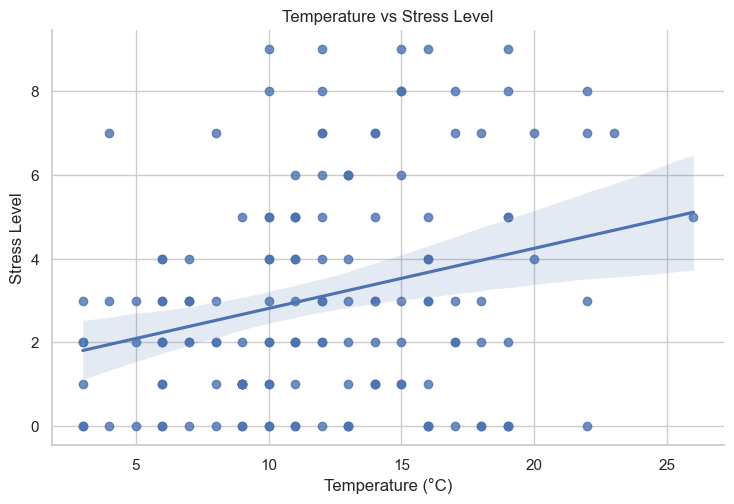

Correlation Coefficient (r): 0.268
P-Value: 0.00100
Reject H₀: Significant relationship.


In [11]:
# Scatter Plot with Regression Line
sns.lmplot(x='Temperature (°C)', y='Stress Level', data=df, aspect=1.5)
plt.title('Temperature vs Stress Level')
plt.show()

# Pearson Correlation
corr_coef, p_value_corr = pearsonr(df['Temperature (°C)'], df['Stress Level'])
print(f"Correlation Coefficient (r): {corr_coef:.3f}")
print(f"P-Value: {p_value_corr:.5f}")
if p_value_corr < 0.05:
    print("Reject H₀: Significant relationship.")
else:
    print("Fail to reject H₀: No significant relationship.")

## ANOVA Test: Weather Condition vs Stress Level

- H₀: Mean stress levels are the same across all weather conditions.
- Hₐ: Mean stress levels differ between weather types.


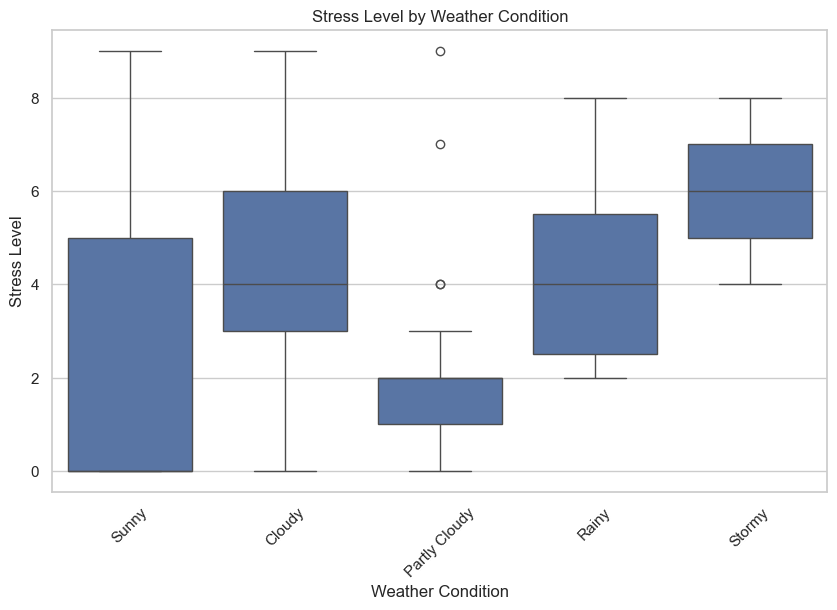

F-statistic: 10.524
P-Value: 0.00000
Reject H₀: Stress levels differ across weather types.


In [13]:
# Boxplot of Stress by Weather
sns.boxplot(x='Weather Condition', y='Stress Level', data=df)
plt.title('Stress Level by Weather Condition')
plt.xticks(rotation=45)
plt.show()

# ANOVA Test
groups = [group['Stress Level'].values for name, group in df.groupby('Weather Condition')]
f_stat, p_value_anova = f_oneway(*groups)
print(f"F-statistic: {f_stat:.3f}")
print(f"P-Value: {p_value_anova:.5f}")
if p_value_anova < 0.05:
    print("Reject H₀: Stress levels differ across weather types.")
else:
    print("Fail to reject H₀: No significant difference.")


## Chi-Square Test: Weather Condition vs Stress Category

- H₀: Weather condition and stress category are independent.
- Hₐ: Weather condition and stress category are dependent.


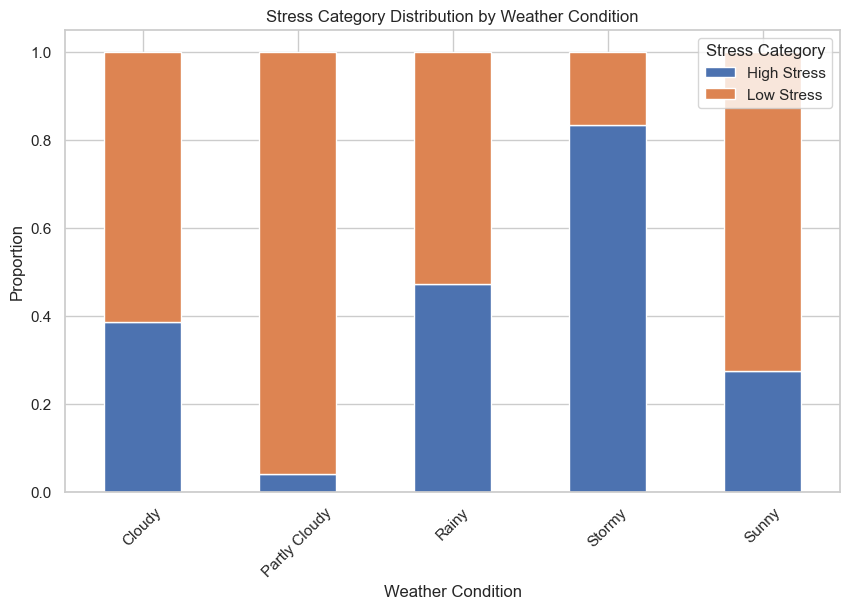

Chi2 Statistic: 29.592
P-Value: 0.00001
Reject H₀: Stress categories depend on weather.


In [15]:
# Create Stress Category
df['Stress Category'] = np.where(df['Stress Level'] >= 5, 'High Stress', 'Low Stress')

# Stacked Bar Plot
contingency_table = pd.crosstab(df['Weather Condition'], df['Stress Category'])
contingency_table.div(contingency_table.sum(1), axis=0).plot(kind='bar', stacked=True)
plt.title('Stress Category Distribution by Weather Condition')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

# Chi-Square Test
chi2, p_value_chi2, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2:.3f}")
print(f"P-Value: {p_value_chi2:.5f}")
if p_value_chi2 < 0.05:
    print("Reject H₀: Stress categories depend on weather.")
else:
    print("Fail to reject H₀: Stress categories are independent of weather.")

## T-Test: Low Temperature vs High Temperature Days

- H₀: Mean stress levels are the same between low and high temperature groups.
- Hₐ: Mean stress levels differ between low and high temperature groups.


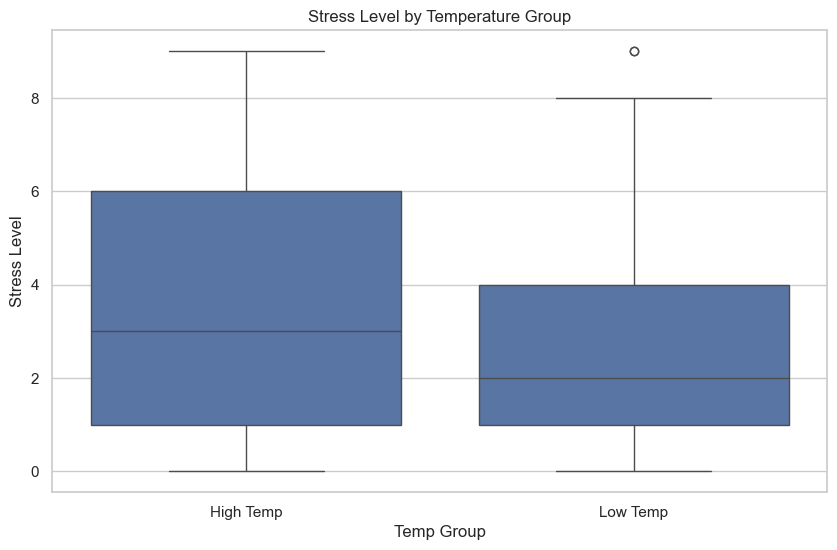

T-Statistic: -1.925
P-Value: 0.05660
Fail to reject H₀: No significant difference between groups.


In [17]:
# Create Temperature Groups
temp_median = df['Temperature (°C)'].median()
df['Temp Group'] = np.where(df['Temperature (°C)'] <= temp_median, 'Low Temp', 'High Temp')

# Boxplot for Stress in Temp Groups
sns.boxplot(x='Temp Group', y='Stress Level', data=df)
plt.title('Stress Level by Temperature Group')
plt.show()

# T-Test
low_temp_stress = df[df['Temp Group'] == 'Low Temp']['Stress Level']
high_temp_stress = df[df['Temp Group'] == 'High Temp']['Stress Level']
t_stat, p_value_ttest = ttest_ind(low_temp_stress, high_temp_stress, equal_var=False)
print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value_ttest:.5f}")
if p_value_ttest < 0.05:
    print("Reject H₀: Stress levels differ between Low and High Temperature groups.")
else:
    print("Fail to reject H₀: No significant difference between groups.")